## Content:
### <a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/">Suicide Rates Overview 1985 to 2016 </a>
* This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.
* <b>Sources</b>:
<ul> <li><a href="http://hdr.undp.org/en/indicators/137506">United Nations Development Program. (2018). Human development index (HDI). </a> </li>
     <li><a href="http://databank.worldbank.org/data/source/world-development-indicators#">World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. </a> </li>
     <li><a href="https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook">[Szamil]. (2017). Suicide in the Twenty-First Century [dataset] </a></li>
     <li><a href="http://www.who.int/mental_health/suicide-prevention/en/">World Health Organization. (2018). Suicide prevention</a></li> </ul>

## Structure
This notebook is seperated into three parts:
<ol><li>Set-up of the notebook and data</li>
<li>A rough exploration of the Data</li>
<li>Visualizing the Data</li></ol>

<font color="red"> This notebook is not yet a finished product</font><br>

## 1. Setup:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# print(plt.style.available)
plt.style.use("seaborn-whitegrid")

In [3]:
df = pd.read_csv(r"C:\Users\JC Jones\Python\Datensets & SQL-Datenbanken\suicide-rates-overview-1985-to-2016\master.csv")

## 2. Data Exploration

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns")

The DataFrame has 27820 rows and 12 columns


### 2.1 Missing values

In [6]:
print("The only column missing values is the HDI column:")
df.isna().sum()

The only column missing values is the HDI column:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
percent = 100*(df["HDI for year"].isna().sum()/len(df["HDI for year"]))
print(f"% of missing values for HDI: {percent:.2f}")

% of missing values for HDI: 69.94


### 2.2 A first look at the columns

In [61]:
SPACE=25

amount_countries = len(df.country.unique())
first_country, last_country = df.country.unique()[0], df.country.unique()[-1]

start_year, stop_year = df.year.min(), df.year.max()

male, male_num = df.sex.value_counts().index[0], df.sex.value_counts()[0]
female, female_num = df.sex.value_counts().index[1], df.sex.value_counts()[1]

group_amount = len(df.age.unique())
age_groups = df.age.unique()

av_suicides, std_suicides = int(df.suicides_no.mean()), int(df.suicides_no.std())

pop_df = df.groupby(["country", "year"]).sum().loc[:,"population"]
low_pop, high_pop = pop_df.loc[pop_df==pop_df.min()], pop_df.loc[pop_df==pop_df.max()]

l_gdp = df["gdp_per_capita ($)"].min()
l_gdp_country = df["year"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].min()].sample(1).values[0]
l_gdp_year = df["country"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].min()].sample(1).values[0]
h_gdp = df["gdp_per_capita ($)"].max()
h_gdp_country = df["year"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].max()].sample(1).values[0]
h_gdp_year = df["country"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].max()].sample(1).values[0]

listed_gens = df.generation.unique()

print("Column country".ljust(SPACE) + f": {amount_countries} unique countrys ranging from {first_country} to {last_country}")
print("Column year".ljust(SPACE) + f": The data starts with the year {start_year} and extends to {stop_year}")
print("Column sex".ljust(SPACE) + f": The dataset contains {male_num} {male} and {female_num} {female} groups")
print("Column age".ljust(SPACE) + f": Is seperated into {group_amount} groups: ")
print(" ".ljust(SPACE + 1), ", ".join(age_groups))
print("Column suicides_no".ljust(SPACE) + f": The average country has {av_suicides} suicides at a standard deviation of {std_suicides}")
print("Column population".ljust(SPACE) + f": Lowest pop: Kiribati with {low_pop.values[0]} people in {low_pop.index[0][1]}")
print(" ".ljust(SPACE + 1), f"Highest pop: United States with {high_pop.values[0]} people in {high_pop.index[0][1]}")
print(".".center(SPACE))
print(".".center(SPACE))
print("Column gdp_per_capita ($)".ljust(SPACE) + ": Lowest gdp per capita: ", l_gdp_country, "in",  l_gdp_year, "with", l_gdp)
print(" ".ljust(SPACE + 1), "Highest gdp per capita: ", h_gdp_country, "in",  h_gdp_year, "with", h_gdp)
print("Column generation".ljust(SPACE-1), ":", ", ".join(listed_gens))

Column country           : 101 unique countrys ranging from Albania to Uzbekistan
Column year              : The data starts with the year 1985 and extends to 2016
Column sex               : The dataset contains 13910 female and 13910 male groups
Column age               : Is seperated into 6 groups: 
                           15-24 years, 35-54 years, 75+ years, 25-34 years, 55-74 years, 5-14 years
Column suicides_no       : The average country has 242 suicides at a standard deviation of 902
Column population        : Lowest pop: Kiribati with 25192 people in 1999
                           Highest pop: United States with 300078511 people in 2015
            .            
            .            
Column gdp_per_capita ($): Lowest gdp per capita:  1992 in Albania with 251
                           Highest gdp per capita:  2014 in Luxembourg with 126352
Column generation        : Generation X, Silent, G.I. Generation, Boomers, Millenials, Generation Z


## 3. Visualization

### 3.1 Suicides by year for some Countrys

In [19]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


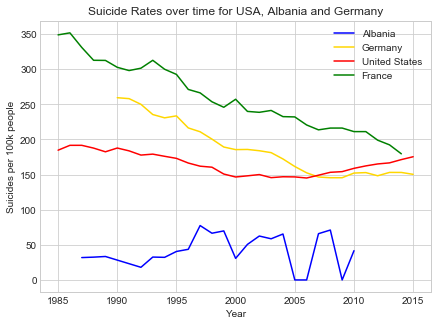

In [20]:
plt.figure(figsize=(7,5))

country_colors = {"Albania": "blue", "Germany": "gold", "United States": "red", "France": "green"}
countries = ["Albania", "Germany", "United States", "France"]
for i in countries:
    country_series =  df.groupby(["country", "year"]).sum().loc[i,"suicides/100k pop"]
    plt.plot(country_series, color=country_colors[i])

plt.legend(["Albania", "Germany", "United States", "France"])
plt.title("Suicide Rates over time for USA, Albania and Germany")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k people")
plt.xticks()
plt.show()

In [21]:
df[(df["country"]=="Albania")&(df["year"].isin([2005,2006,2009]))].sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
200,Albania,2005,male,35-54 years,0,380242,0.0,Albania2005,0.695,"8,158,548,717",2931,Boomers
250,Albania,2009,male,55-74 years,0,234570,0.0,Albania2009,NaN,"12,044,212,904",4387,Silent
210,Albania,2006,male,15-24 years,0,286679,0.0,Albania2006,NaN,"8,992,642,349",3235,Millenials
192,Albania,2005,female,15-24 years,0,281922,0.0,Albania2005,0.695,"8,158,548,717",2931,Millenials
201,Albania,2005,male,5-14 years,0,291367,0.0,Albania2005,0.695,"8,158,548,717",2931,Millenials


<b>Interpretation:</b>
* While <b>France</b> had the highest sucidie-rate of the four countries in the 1980s, it  managed to <b>steadily decrease the number of suicides</b>. 
* The <b>United States</b> started off with a comparably low number of suicides but <b>somewhere between 2005 and 2008</b> their suicide-rate began to <b>rise again</b>.
* Like France, <b>Germany</b> also <b>reduced</b> the number of people committing <b>suicide</b>.
* <b>Albania</b> is <b>dropped from further exploration</b> due to the lack of data in 2005, 2006 and 2009

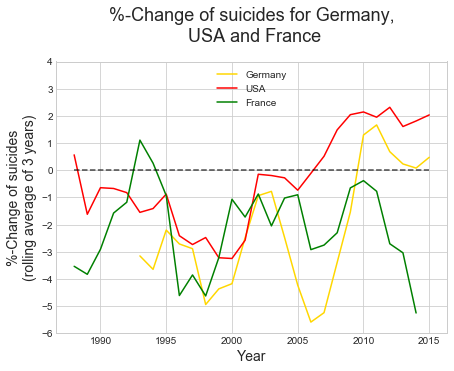

In [22]:
NUM = 3

plt.figure(figsize=(7,5))
countries = ["Germany", "United States", "France"]

for i in countries:
    country_series =  df.groupby(["country", "year"]).sum().loc[i,"suicides/100k pop"]
    country_perc = (country_series/country_series.shift(1)-1).rolling(NUM).mean()*100
    plt.plot(country_perc, color=country_colors[i])


plt.plot([1985+NUM,2015],[0,0], linestyle="--", color="k", alpha=0.7)
plt.legend(["Germany", "USA", "France"], loc="upper center")
plt.yticks(ticks=np.arange(-6,5))
plt.xlabel("Year", fontdict={"fontsize":14})
plt.ylabel(f"%-Change of suicides\n(rolling average of {NUM} years)", fontdict={"fontsize":14})
plt.title("%-Change of suicides for Germany,\n USA and France", fontdict={"fontsize": 18}, pad=20, loc="center")


plt.show()

<b>Interpretation:</b>
* <b>France</b> managed to <b>steadily decrease</b> their suicide-number with only a slight increase in the 1990s.
* <b>Germany</b> on the other hand had <b>a good run between 1990 and 2009</b>. <b>From 2010 onwards</b> its suicide-rate per 100k capita started to <b>slowly increase</b> again.
* The <b>United States</b> reduced their suicide-rate steadily until <b>somewhere between 2005 and 2008</b> where their suicide-rate began to <b>rise again</b>.


### 3.2 Suicides for different age-groups in Germany

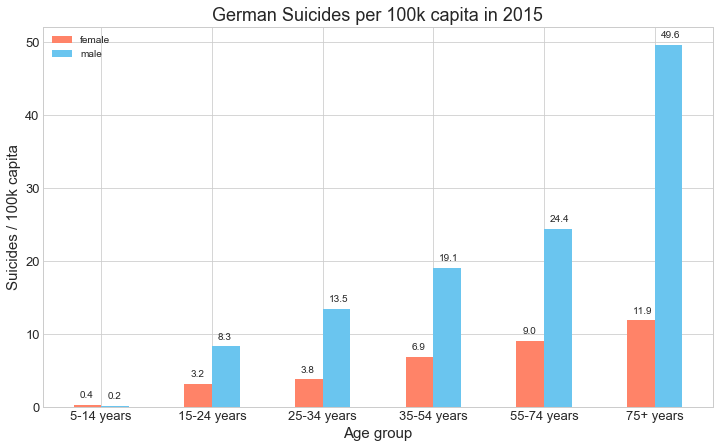

In [23]:
color = {"f": "#ff8368", "m": "#6ac5ef"}

gdf = df[df.country=="Germany"]
g2015 = gdf.loc[gdf["year"]==2015,]
g2015_suicides = g2015.loc[:,["age", "sex", "suicides/100k pop"]].groupby(["age", "sex"]).sum()
g2015_suicides = g2015_suicides.reindex(["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], level=0)
g2015_suicides_arr = g2015_suicides.values.reshape(6,2)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=13)

for i in range(0,6):
    plt.bar(i-0.25, g2015_suicides_arr[i,0], color=color["f"],width=0.25, align="edge")
    plt.bar(i, g2015_suicides_arr[i,1], color=color["m"],width=0.25, align="edge")

for num, i in enumerate(ax.patches):
    if num%2==0:
        ax.text(i.get_x()+0.055, i.get_height()+1, str(round(i.get_height(),1)))
    else:
        ax.text(i.get_x()+0.055, i.get_height()+1, str(round(i.get_height(),1)))
       
plt.xticks(np.arange(0,6), labels=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
plt.legend(["female", "male"])
plt.title("German Suicides per 100k capita in 2015", fontdict={"fontsize":18})
plt.xlabel("Age group", fontdict={"fontsize": 15})
plt.ylabel("Suicides / 100k capita", fontdict={"fontsize": 15})
plt.show()

In [24]:
ratio = []
for i in range(6):
    ratio.append(g2015_suicides_arr[i,1]/g2015_suicides_arr[i,0])
    
pd.DataFrame(index=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], data={"Ratio of male to female suicides in 2015":np.around(ratio, decimals=2)})

,Ratio of male to female suicides in 2015
5-14 years,0.43
15-24 years,2.57
25-34 years,3.55
35-54 years,2.78
55-74 years,2.70
75+ years,4.17


<b>Interpretation:</b>
* Judging from the latest datapoints (2015), the <b>suicide-rate</b> in Germany was at its <b>lowest</b> in the group of <b>5-14 years old</b> and <b>steadily increases with growing age</b>.
* Generally speaking, in 2015 <b>males</b> were multiple times <b>more likely to commit suicide</b>. 

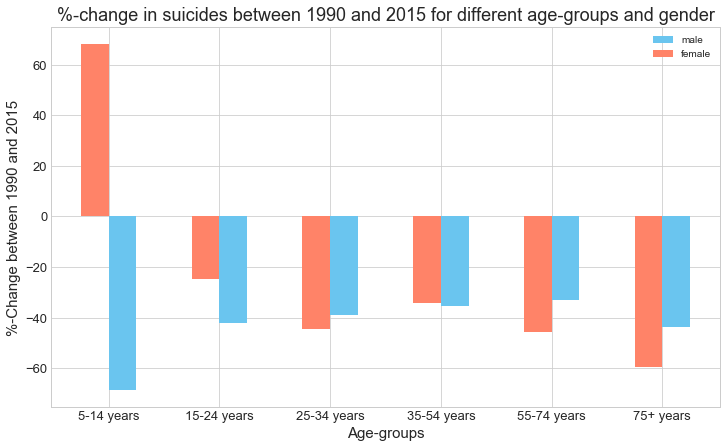

In [25]:
COLOR = {"f": "#ff8368", "m": "#6ac5ef"}

country = df.country == "Germany"
y_min, y_max = df.loc[(country), "year"].min(), df.loc[(country), "year"].max()
d = {year: {age: {gender:[] for gender in df.sex.unique()} for age in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]} for year in (y_min, y_max)}


for gender in df.sex.unique():
    for i in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]:
        d[y_min][i][gender].append(df.loc[(country)&(df.age==i)&(df.year==y_min)&(df.sex==gender), "suicides/100k pop"].values[0])
        d[y_max][i][gender].append(df.loc[(country)&(df.age==i)&(df.year==y_max)&(df.sex==gender), "suicides/100k pop"].values[0])

        

plt.figure(figsize=(12,7))
c=0
for age in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]:
    for num, gender in enumerate(df.sex.unique()):
        rate = (1-(d[y_max][age][gender][0]/d[y_min][age][gender][0]))*100
        
        if gender=="female":
            plt.bar(c-0.25, rate*-1, color=COLOR["f"],width=0.25, align="edge")
        else:
            plt.bar(c, rate*-1, color=COLOR["m"],width=0.25, align="edge")
        if num == 1:
            c+=1

            
plt.title(f"%-change in suicides between {y_min} and {y_max} for different age-groups and gender", fontsize=18)
plt.ylabel(f"%-Change between {y_min} and {y_max}", fontdict={"fontsize":15})
plt.xlabel("Age-groups", fontdict={"fontsize":15})
plt.xticks(ticks=np.arange(0,6), labels=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], fontsize=13)
plt.yticks(fontsize=13)
plt.legend(df.sex.unique())

plt.show()

<b>Interpretation:</b>
* Almost all age-groups were <b>less likely to commit suicide</b> in 2015 compared to 1990. 
* Only the category of <b>girls between 5 and 14 years</b> saw a sharp <b>increase in suicides</b> in 2015 compared to 1990.
* The age-group of <b>5-14 year old boys</b> saw the <b>highest percentual decrease</b> in suicides.
* In relative terms women aged 25 and older saw a higher percentual decrease of their suicide-rate than their male counterparts.

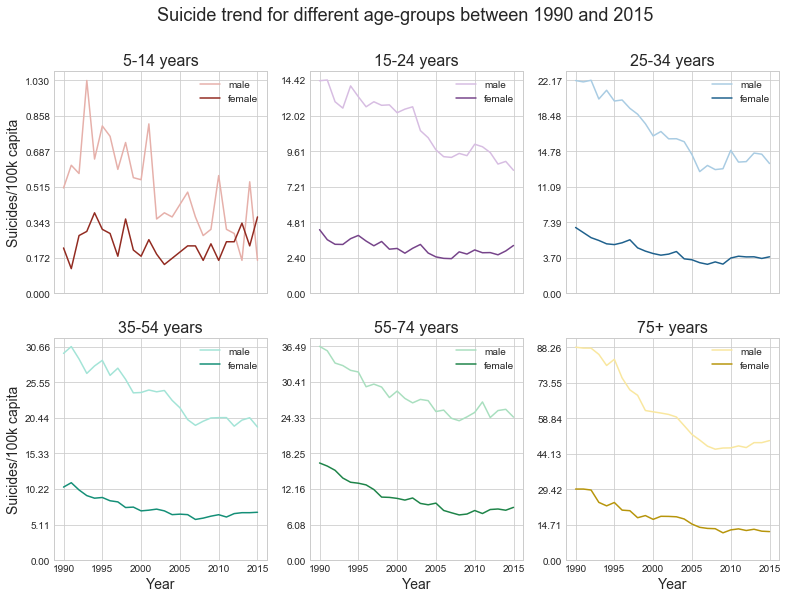

In [26]:
age_groups = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
col = {"5-14 years": {"m":  "#e6b0aa" , "f": "#922b21"}, "15-24 years": {"m": "#d7bde2", "f": "#76448a"}, 
          "25-34 years": {"m": "#a9cce3", "f": "#1f618d"}, "35-54 years": {"m": "#a3e4d7", "f": "#148f77"}, 
          "55-74 years": {"m": "#a9dfbf", "f": "#1e8449"}, "75+ years": {"m": "#f9e79f", "f": "#b7950b"}}

fig, ax = plt.subplots(2,3, figsize=(13,9), sharex=True)
ax = ax.flatten()


for num, age_group in enumerate(age_groups):
    
    condition = (df["age"]==age_group)&(df["country"]=="Germany")
    group_df = df.loc[condition, ["suicides/100k pop", "sex", "year"]]    
    
    y_min, y_max = group_df.year.min(), group_df.year.max()
    timespan = np.arange(y_min, y_max+1)
    
    male_df = group_df.loc[group_df.sex=="male", "suicides/100k pop"]
    female_df = group_df.loc[group_df.sex=="female", "suicides/100k pop"]
    
    ax[num].plot(timespan, male_df, color=col[age_group]["m"])
    ax[num].plot(timespan, female_df, color=col[age_group]["f"])

    ax[num].set_title(age_group, fontdict={"fontsize": 16})
    if num > 2:
        ax[num].set_xlabel("Year", fontdict={"fontsize": 14})
    if num % 3 ==0:
        ax[num].set_ylabel("Suicides/100k capita", fontdict={"fontsize": 14})
    ax[num].legend(["male", "female"])
    ax[num].set_yticks(ticks=np.linspace(0,np.maximum(male_df, female_df).max(),7))

plt.suptitle(f"Suicide trend for different age-groups between {y_min} and {y_max}", fontsize=18)
plt.show()

<b>Interpretation:</b>
* The graphs show a <b>downward trend</b> for most of the age-groups.
* In absolute terms, the male population saw a higher decrease in suicides.

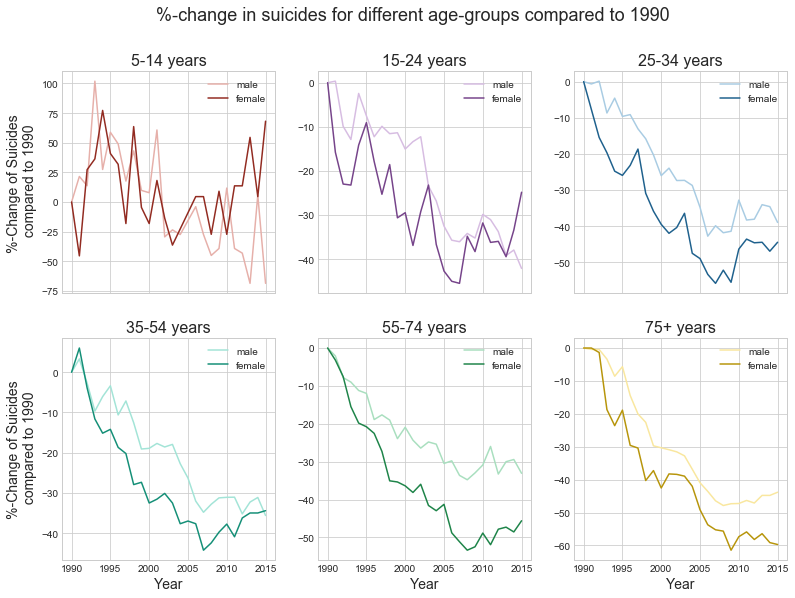

In [67]:
fig, ax = plt.subplots(2,3, figsize=(13,9), sharex=True)
ax = ax.flatten()

for num, age_group in enumerate(age_groups):
    
    condition    = (df["age"]==age_group)&(df["country"]=="Germany")
    group_df     = df.loc[condition, ["suicides/100k pop", "sex", "year"]]    
    
    male_df      = group_df.loc[group_df.sex=="male", "suicides/100k pop"]
    female_df    = group_df.loc[group_df.sex=="female", "suicides/100k pop"]
    
    y_min, y_max = group_df.year.min(), group_df.year.max()
    timespan     = np.arange(y_min, y_max+1)
    
    ax[num].plot(timespan, ((male_df/male_df.iloc[0]-1)*100), color=col[age_group]["m"])
    ax[num].plot(timespan, ((female_df/female_df.iloc[0]-1)*100), color=col[age_group]["f"])

    ax[num].set_title(age_group, fontdict={"fontsize": 16})
    if num > 2:
        ax[num].set_xlabel("Year", fontdict={"fontsize": 14})
    if num % 3 ==0:
        ax[num].set_ylabel(f"%-Change of Suicides\n compared to {y_min}", fontdict={"fontsize": 14})

    ax[num].legend(["male", "female"], loc="upper right")
    
fig.suptitle(f"%-change in suicides for different age-groups compared to 1990", fontsize=18)
plt.show()

<b>Interpretation:</b>

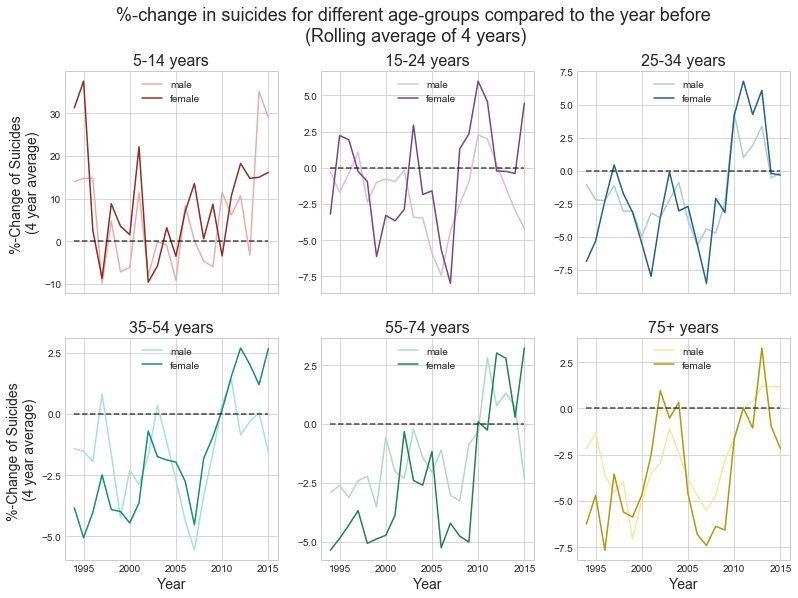

In [68]:
fig, ax = plt.subplots(2,3, figsize=(13,9), sharex=True)
ax = ax.flatten()

ROLL_NUM = 4


for num, age_group in enumerate(age_groups):
    
    condition = (df["age"]==age_group)&(df["country"]=="Germany")
    group_df = df.loc[condition, ["suicides/100k pop", "sex", "year"]]    
    
    male_df = group_df.loc[group_df.sex=="male", "suicides/100k pop"]
    female_df = group_df.loc[group_df.sex=="female", "suicides/100k pop"]
    
    y_min, y_max = group_df.year.min(), group_df.year.max()
    timespan = np.arange(y_min, y_max+1)
    
    ax[num].plot(timespan, ((male_df/male_df.shift(1)-1)*100).rolling(ROLL_NUM).mean(), color=col[age_group]["m"])
    ax[num].plot(timespan, ((female_df/female_df.shift(1)-1)*100).rolling(ROLL_NUM).mean(), color=col[age_group]["f"])

    ax[num].set_title(age_group, fontdict={"fontsize": 16})
    if num > 2:
        ax[num].set_xlabel("Year", fontdict={"fontsize": 14})
    if num % 3 ==0:
        ax[num].set_ylabel(f"%-Change of Suicides \n({ROLL_NUM} year average)", fontdict={"fontsize": 14})
    if num > 0:
        ax[num].set_yticks(np.linspace(-10, 10, 9))
    ax[num].legend(["male", "female"], loc=9)
    
    ax[num].plot([y_min+ROLL_NUM, y_max], [0,0], linestyle="--", color="k", alpha=0.7)

fig.suptitle(f"%-change in suicides for different age-groups compared to the year before \n(Rolling average of {ROLL_NUM} years)", fontsize=18)
plt.show()

<b>Interpretation:</b>